### 17 April, 2024
### CSC354 – Assignment3 – ML – Support Vector Machines
### Muhammad Umar Asif
### FA21-BSE-075

In [26]:
#import libraries
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

#import ML evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

## Question 1

In [8]:
df = pd.read_csv("dataset-q-1.csv", header=None)
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

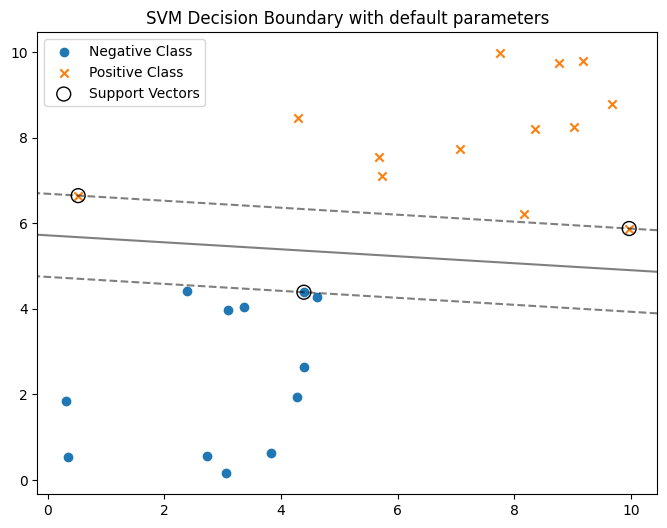

In [18]:
svm_model = SVC(kernel='linear')
svm_model.fit(features, target)
plt.figure(figsize=(8, 6))
plt.scatter(features[target == -1][0], features[target == -1][1], label='Negative Class', marker='o')
plt.scatter(features[target == 1][0], features[target == 1][1], label='Positive Class', marker='x')

axes = plt.gca()
x_lim = axes.get_xlim()
y_lim = axes.get_ylim()
x_axis = np.linspace(x_lim[0], x_lim[1], 30)
y_axis = np.linspace(y_lim[0], y_lim[1], 30)
YY, XX = np.meshgrid(y_axis, x_axis)

grid_points = np.vstack([XX.ravel(), YY.ravel()]).T
decision_values = svm_model.decision_function(grid_points).reshape(XX.shape)
axes.contour(XX, YY, decision_values, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
axes.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM Decision Boundary with default parameters')
plt.legend()
plt.show()


#### **1. Do the positive and negative instances group together, suggesting a clear separation between the classes?**
Yes, the positive and negative suggesting a clear separation between classes
#### **2. Are there any outliers? If yes, can you spot them?**
Yes, there are outliers in both classes. As we can see there are some data points that have significantly higher or lower values compared to others and are far from support vectors.
## Question 2
#### **1. Rerun the experiment from Q1 with C = 0.01. Plot again and note down your findings. Does the hyperplane misclassify (handle) any outliers?**

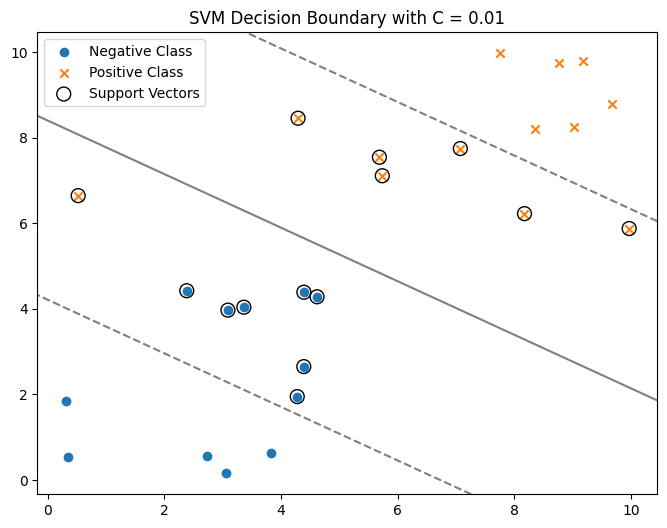

In [24]:
# SVM with C = 0.01

svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(features, target)
plt.figure(figsize=(8, 6))
plt.scatter(features[target == -1][0], features[target == -1][1], label='Negative Class', marker='o')
plt.scatter(features[target == 1][0], features[target == 1][1], label='Positive Class', marker='x')

axes = plt.gca()
x_lim = axes.get_xlim()
y_lim = axes.get_ylim()
x_axis = np.linspace(x_lim[0], x_lim[1], 30)
y_axis = np.linspace(y_lim[0], y_lim[1], 30)
YY, XX = np.meshgrid(y_axis, x_axis)

grid_points = np.vstack([XX.ravel(), YY.ravel()]).T
decision_values = svm_model.decision_function(grid_points).reshape(XX.shape)
axes.contour(XX, YY, decision_values, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
axes.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('SVM Decision Boundary with C = 0.01')
plt.legend()
plt.show()


With a very small C value (0.01), the SVM model applies a higher penalty for misclassification errors, resulting in a wider margin and potentially allowing more outliers to be included within the margin or even misclassified.

#### **2. Try increasing the value of C (100, 300, 700, 1000) and observe the effect on the resulting hyperplanes.**

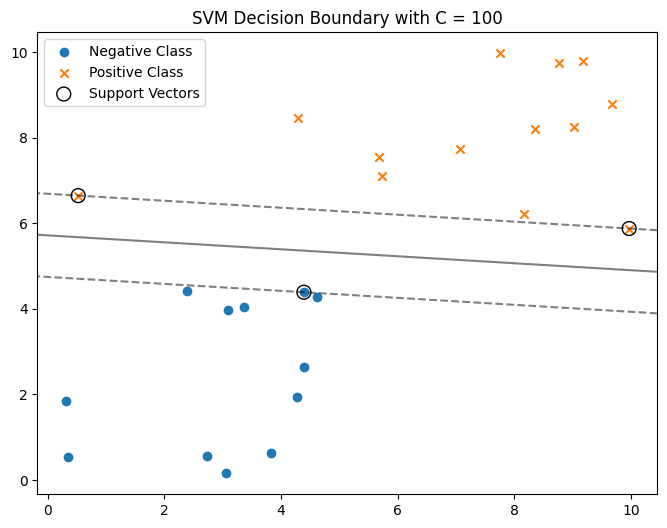

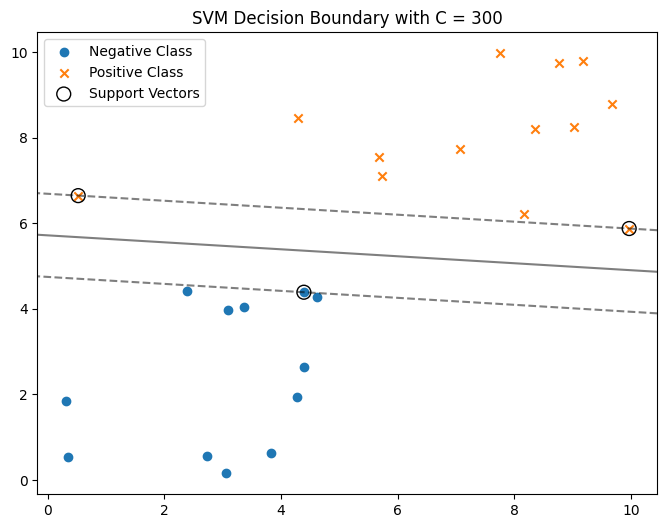

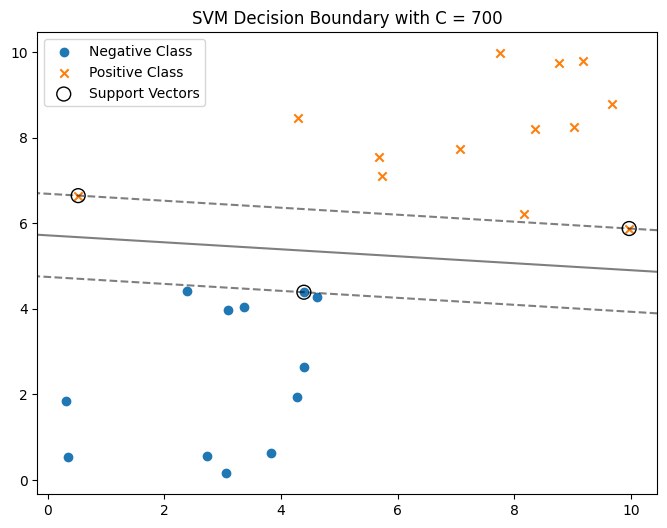

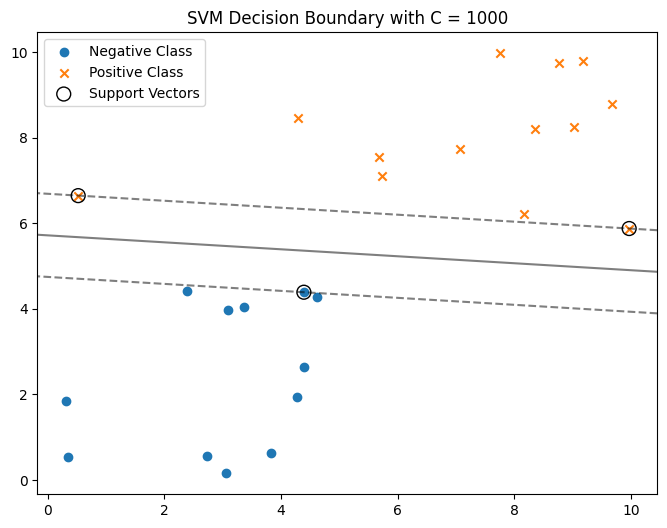

In [25]:
# SVM with higher values for C

c_values = [100, 300, 700, 1000]
for c in c_values:
    svm_model = SVC(kernel='linear', C=c)
    svm_model.fit(features, target)
    plt.figure(figsize=(8, 6))
    plt.scatter(features[target == -1][0], features[target == -1][1], label='Negative Class', marker='o')
    plt.scatter(features[target == 1][0], features[target == 1][1], label='Positive Class', marker='x')

    axes = plt.gca()
    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim()
    x_axis = np.linspace(x_lim[0], x_lim[1], 30)
    y_axis = np.linspace(y_lim[0], y_lim[1], 30)
    YY, XX = np.meshgrid(y_axis, x_axis)

    grid_points = np.vstack([XX.ravel(), YY.ravel()]).T
    decision_values = svm_model.decision_function(grid_points).reshape(XX.shape)
    axes.contour(XX, YY, decision_values, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    axes.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.title(f'SVM Decision Boundary with C = {c}')
    plt.legend()
    plt.show()


As C increases (100, 300, 700, 1000), the SVM model applies a smaller penalty for misclassification errors, leading to narrower margins and potentially better handling of outliers. Higher C values can result in hyperplanes that fit the training data more closely, which may increase the risk of overfitting but could also improve generalization performance depending on the dataset.

## Question 3

In [31]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2] # use the first two features
Y = iris.target

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### **1. Which kernel settings result in better performance?**

In [34]:
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train,Y_train)
prediction = svm_poly.predict(x_test)
print("SVM with polynomial kernel degree 2")
accuracy = metrics.accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.4f}")

SVM with polynomial kernel degree 2
Accuracy: 0.8333


In [46]:
svm_rbf = SVC(kernel='rbf', gamma=1)
svm_rbf.fit(X_train,Y_train)
prediction = svm_rbf.predict(x_test)
print("SVM with Gaussian kernel sigma 1")
accuracy = metrics.accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.4f}")

SVM with Gaussian kernel sigma 1
Accuracy: 0.9000


SVM with Kernel Gaussian and sigma value 1 has better results than the linear kernel with degree of 2.

#### **2. Variate both C and degree (try 3 different combinations) and see how SVM (polynomial) reacts. Report your findings.**

In [42]:
poly_param = [(1, 2), (10, 3), (100, 2)]
for C, degree in poly_param:
    svm_poly = SVC(kernel='poly', degree=degree, C=C)
    svm_poly.fit(X_train, Y_train)
    y_pred_poly = svm_poly.predict(x_test)
    accuracy_poly = accuracy_score(y_test, y_pred_poly)
    print(f"SVM with polynomial kernel (degree={degree}, C={C}):")
    print(f"  Accuracy: {accuracy_poly:.4f}")

SVM with polynomial kernel (degree=2, C=1):
  Accuracy: 0.8333
SVM with polynomial kernel (degree=3, C=10):
  Accuracy: 0.8000
SVM with polynomial kernel (degree=2, C=100):
  Accuracy: 0.9000


Varying C affects the regularization strength, with higher C values potentially leading to more complex decision boundaries.
Varying degree affects the complexity of the polynomial transformation applied to the feature space.
Higher values of C and moderate values of degree can result in improved accuracy, but too high a degree can lead to overfitting.

#### **3. Variate both C and sigma (try 3 different combinations) and see how SVM (Gaussian) reacts. Report your findings.**

In [45]:
rbf_param = [(1, 0.1), (10, 2), (100, 10)]

for C, sigma in rbf_param:
    svm_rbf = SVC(kernel='rbf', gamma=1/(2*sigma**2), C=C)
    svm_rbf.fit(X_train, Y_train)
    y_pred_rbf = svm_rbf.predict(x_test)
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
    print(f"SVM with Gaussian (RBF) kernel (sigma={sigma}, C={C}):")
    print(f"  Accuracy: {accuracy_rbf:.4f}")


SVM with Gaussian (RBF) kernel (sigma=0.1, C=1):
  Accuracy: 0.8333
SVM with Gaussian (RBF) kernel (sigma=2, C=10):
  Accuracy: 0.8333
SVM with Gaussian (RBF) kernel (sigma=10, C=100):
  Accuracy: 0.9000


Varying C affects the trade-off between maximizing the margin and minimizing the classification error.
Varying sigma (or gamma) controls the width of the Gaussian function, influencing the smoothness and flexibility of the decision boundary.
Moderate values of C and sigma often lead to good generalization performance, balancing between bias and variance.

## Question 4
#### **Use the dataset (dataset-q-4.csv) and try to fit a gaussian kernel SVM (80/20 split) with the optimal values of C and sigma.**

In [51]:
df = pd.read_csv("dataset-q-4.csv", header=None)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1] 
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
rbf_param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 20, 50, 100], 
    'gamma': [0.01, 0.1, 1, 5, 10, 20, 50, 100] 
    }

svm_model = SVC(kernel='rbf')
svm_cv = GridSearchCV(svm_model, param_grid=rbf_param_grid, cv=5, scoring='accuracy')
svm_cv.fit(X_train, Y_train)

best_params = svm_cv.best_params_
best_score = svm_cv.best_score_
print("Best Parameters:", best_params)

best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, Y_train)
y_pred = best_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Parameters: {accuracy:.4f}")


Best Parameters: {'C': 50, 'gamma': 0.01}
Accuracy with Best Parameters: 0.9615


Grid Search CV with cross validation of 5 gave the optimal parameters of Gaussian Kernel SVM.\
The optimal parameters are C = 50 and gamma = 0.01\
The accuracy achieved by using these parameters is 96%.